# Unit 4: Applied Machine Learning 2
## Task 7: Dense network
###### Candelaria Retamal
###### **29.06.2022**


Finally, try with neural networks.

> **Note**: It is up to you if you want to implement your neural networks for this and the next task with TensorFlow’s low-level API or the Keras API. Our recommendation is to practice your knowledge of the Keras API, as this approach is quicker to implement, more straight forward to read and most importantly, the Keras API is since TensorFlow version 2.0 also the preferred API of TensorFlow itself.

#### 7.1. Layer dense network i.e. no hidden layer, just the input and output ones    


Load the data.

In [1]:
import numpy as np
import os
import tensorflow as tf

# Load data
with np.load("features_trainset.npz") as npz_file:
    X_train = npz_file["data"]
    y_train = npz_file["label"]

print("X train:", X_train.shape, X_train.dtype)
print("y train:", y_train.shape, y_train.dtype)

with np.load("features_testset.npz") as npz_file:
    X_test = npz_file["data"]
    y_test = npz_file["label"]

print("X test:", X_test.shape, X_test.dtype)
print("y test:", y_test.shape, y_test.dtype)

with np.load("features_validset.npz") as npz_file:
    X_valid = npz_file["data"]
    y_valid = npz_file["label"]
    
    
print("X valid:", X_valid.shape, X_valid.dtype)
print("y valid:", y_valid.shape, y_valid.dtype)




# Convert to float
y_train = y_train.astype(np.int64)
y_test = y_test.astype(np.int64)
y_valid = y_valid.astype(np.int64)
# Print the new data type
print('dtype:', y_train.dtype)
print('dtype:', y_test.dtype)
print('dtype:', y_valid.dtype)

X train: (280, 1280) float32
y train: (280, 6) float32
X test: (50, 1280) float32
y test: (50, 6) float32
X valid: (139, 1280) float32
y valid: (139, 6) float32
dtype: int64
dtype: int64
dtype: int64


I define a function to convert one-hot encoding into indices. This way I can recover the class for the NN model.

In [2]:
def decode_one_hot(batch_of_vectors):
  """Computes indices for the non-zero entries in batched one-hot vectors.

  Args:
    batch_of_vectors: A Tensor with length-N vectors, having shape [..., N].
  Returns:
    An integer Tensor with shape [...] indicating the index of the non-zero
    value in each vector.
  """
  nonzero_indices = tf.where(tf.not_equal(
      batch_of_vectors, tf.zeros_like(batch_of_vectors)))
  reshaped_nonzero_indices = tf.reshape(
      nonzero_indices[:, -1], tf.shape(batch_of_vectors)[:-1])
  return reshaped_nonzero_indices

Decoding labels...

In [3]:
y_train = decode_one_hot(y_train)
y_test = decode_one_hot(y_test)
y_train
y_test

2022-06-30 14:46:49.436470: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-30 14:46:49.732486: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6373 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1080, pci bus id: 0000:01:00.0, compute capability: 6.1


<tf.Tensor: shape=(50,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4,
       4, 5, 5, 5, 5, 5])>

In [4]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


I define the dense network using the Sequential model from KERAS.

In [5]:
model = Sequential()
# model.add(Input(6, activation="relu", input_dim=1 * 1280))
model.add(Dense(6, activation="softmax", input_dim=1 * 1280))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 7686      
Total params: 7,686
Trainable params: 7,686
Non-trainable params: 0
_________________________________________________________________


I compile the model by defining the optimizer, loss function and the metrics.

In [7]:
from tensorflow.keras import losses
from tensorflow.keras import metrics

# Define loss function, optimizer, and metrics to track during training
model.compile(
    optimizer="sgd",                         # .. or optimizers.SGD(lr=0.01)
    loss="sparse_categorical_crossentropy",  # .. or losses.sparse_categorical_crossentropy
    metrics=["acc"],                         # .. or metrics.sparse_categorical_accuracy
)

Fitting the model...

In [8]:
# Fit model
history = model.fit(
    x=X_train,
    y=y_train,
    validation_split=0.2,
    batch_size=5,
    epochs=25,
    shuffle=True,  # Shuffle training samples
)

2022-06-30 14:46:58.741345: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/25
45/45 [==============================] - 0s 3ms/step - loss: 0.7193 - acc: 0.7946 - val_loss: 2.7341 - val_acc: 0.1607
Epoch 2/25
45/45 [==============================] - 0s 1ms/step - loss: 0.2348 - acc: 0.9375 - val_loss: 2.6657 - val_acc: 0.3571
Epoch 3/25
45/45 [==============================] - 0s 1ms/step - loss: 0.1528 - acc: 0.9643 - val_loss: 2.9106 - val_acc: 0.2857
Epoch 4/25
45/45 [==============================] - 0s 1ms/step - loss: 0.1141 - acc: 0.9821 - val_loss: 2.6522 - val_acc: 0.4821
Epoch 5/25
45/45 [==============================] - 0s 1ms/step - loss: 0.0928 - acc: 0.9911 - val_loss: 2.9068 - val_acc: 0.3393
Epoch 6/25
45/45 [==============================] - 0s 1ms/step - loss: 0.0733 - acc: 1.0000 - val_loss: 2.8526 - val_acc: 0.4107
Epoch 7/25
45/45 [==============================] - 0s 1ms/step - loss: 0.0618 - acc: 1.0000 - val_loss: 3.0153 - val_acc: 0.3929
Epoch 8/25
45/45 [==============================] - 0s 1ms/step - loss: 0.0524 - acc: 1.00

I plot the results of validation accuracy and loss function.

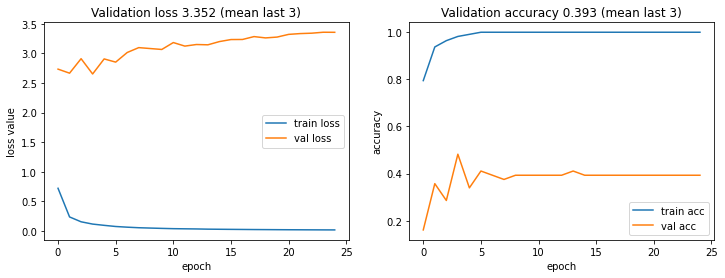

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Create two plots: one for the loss value, one for the accuracy
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot accuracy values
ax1.plot(history.history["loss"], label="train loss")
ax1.plot(history.history["val_loss"], label="val loss")
ax1.set_title(
    "Validation loss {:.3f} (mean last 3)".format(
        np.mean(history.history["val_loss"][-3:])  # last three values
    )
)
ax1.set_xlabel("epoch")
ax1.set_ylabel("loss value")
ax1.legend()

# Plot accuracy values
ax2.plot(history.history["acc"], label="train acc")
ax2.plot(history.history["val_acc"], label="val acc")
ax2.set_title(
    "Validation accuracy {:.3f} (mean last 3)".format(
        np.mean(history.history["val_acc"][-3:])  # last three values
    )
)
ax2.set_xlabel("epoch")
ax2.set_ylabel("accuracy")
ax2.legend()
plt.show()

I evaluate the model.

In [10]:
(test_loss, test_accuracy) = model.evaluate(X_test, y_test, batch_size=32)

print("Test loss: {:.2f}".format(test_loss))
print("Test accuracy: {:.2f}%".format(100 * test_accuracy))


2/2 [==============================] - 0s 1ms/step - loss: 0.9768 - acc: 0.8000
Test loss: 0.98
Test accuracy: 80.00%


#### 7.2. Layer dense network i.e. one hidden layer

Same process but now with a hidden layer.

In [48]:
import numpy as np
import os
import tensorflow as tf

# Load data
with np.load("features_trainset.npz") as npz_file:
    X_train = npz_file["data"]
    y_train = npz_file["label"]

print("X train:", X_train.shape, X_train.dtype)
print("y train:", y_train.shape, y_train.dtype)

with np.load("features_testset.npz") as npz_file:
    X_test = npz_file["data"]
    y_test = npz_file["label"]

print("X test:", X_test.shape, X_test.dtype)
print("y test:", y_test.shape, y_test.dtype)

with np.load("features_validset.npz") as npz_file:
    X_valid = npz_file["data"]
    y_valid = npz_file["label"]
    
    
print("X valid:", X_valid.shape, X_valid.dtype)
print("y valid:", y_valid.shape, y_valid.dtype)




# Convert to float
y_train = y_train.astype(np.int64)
y_test = y_test.astype(np.int64)
y_valid = y_valid.astype(np.int64)
# Print the new data type
print('dtype:', y_train.dtype)
print('dtype:', y_test.dtype)
print('dtype:', y_valid.dtype)

X train: (280, 1280) float32
y train: (280, 6) float32
X test: (50, 1280) float32
y test: (50, 6) float32
X valid: (139, 1280) float32
y valid: (139, 6) float32
dtype: int64
dtype: int64
dtype: int64


In [49]:
y_train = decode_one_hot(y_train)
y_test = decode_one_hot(y_test)
y_valid = decode_one_hot(y_valid)
y_train
y_test

<tf.Tensor: shape=(50,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4,
       4, 5, 5, 5, 5, 5])>

In [50]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


In [51]:
model = Sequential()
# model.add(Input(6, activation="relu", input_dim=1 * 1280))
model.add(Dense(100, activation="relu", input_dim=1 * 1280))
model.add(Dense(6, activation="softmax"))
model.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 100)               128100    
_________________________________________________________________
dense_10 (Dense)             (None, 6)                 606       
Total params: 128,706
Trainable params: 128,706
Non-trainable params: 0
_________________________________________________________________


In [52]:
from tensorflow.keras import optimizers

# Define loss function, optimizer and metrics to track during training
model.compile(optimizer="sgd",
              loss="sparse_categorical_crossentropy",
              metrics=["acc"])

In [53]:
from tensorflow.keras import losses
from tensorflow.keras import metrics

# Define loss function, optimizer, and metrics to track during training
model.compile(
    optimizer="sgd",                         # .. or optimizers.SGD(lr=0.01)
    loss="sparse_categorical_crossentropy",  # .. or losses.sparse_categorical_crossentropy
    metrics=["acc"],                         # .. or metrics.sparse_categorical_accuracy
)

In [54]:
# Fit model
history = model.fit(
    x=X_train,
    y=y_train,
    validation_split=0.2,
    batch_size=5,
    epochs=25,
    shuffle=True,  # Shuffle training samples
)

Epoch 1/25
45/45 [==============================] - 0s 3ms/step - loss: 0.7858 - acc: 0.7455 - val_loss: 2.8038 - val_acc: 0.0000e+00
Epoch 2/25
45/45 [==============================] - 0s 1ms/step - loss: 0.2415 - acc: 0.9286 - val_loss: 2.5219 - val_acc: 0.3571
Epoch 3/25
45/45 [==============================] - 0s 1ms/step - loss: 0.1360 - acc: 0.9821 - val_loss: 3.0584 - val_acc: 0.1429
Epoch 4/25
45/45 [==============================] - 0s 1ms/step - loss: 0.0959 - acc: 0.9955 - val_loss: 2.9429 - val_acc: 0.2857
Epoch 5/25
45/45 [==============================] - 0s 1ms/step - loss: 0.0701 - acc: 0.9911 - val_loss: 3.0788 - val_acc: 0.2857
Epoch 6/25
45/45 [==============================] - 0s 1ms/step - loss: 0.0549 - acc: 1.0000 - val_loss: 3.1213 - val_acc: 0.2857
Epoch 7/25
45/45 [==============================] - 0s 1ms/step - loss: 0.0465 - acc: 1.0000 - val_loss: 2.9842 - val_acc: 0.4286
Epoch 8/25
45/45 [==============================] - 0s 1ms/step - loss: 0.0386 - acc: 

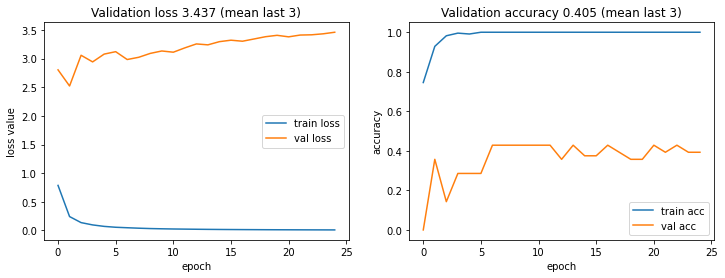

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Create two plots: one for the loss value, one for the accuracy
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot accuracy values
ax1.plot(history.history["loss"], label="train loss")
ax1.plot(history.history["val_loss"], label="val loss")
ax1.set_title(
    "Validation loss {:.3f} (mean last 3)".format(
        np.mean(history.history["val_loss"][-3:])  # last three values
    )
)
ax1.set_xlabel("epoch")
ax1.set_ylabel("loss value")
ax1.legend()

# Plot accuracy values
ax2.plot(history.history["acc"], label="train acc")
ax2.plot(history.history["val_acc"], label="val acc")
ax2.set_title(
    "Validation accuracy {:.3f} (mean last 3)".format(
        np.mean(history.history["val_acc"][-3:])  # last three values
    )
)
ax2.set_xlabel("epoch")
ax2.set_ylabel("accuracy")
ax2.legend()
plt.show()

In [56]:
(test_loss, test_accuracy) = model.evaluate(X_valid, y_valid, batch_size=32)

print("Test loss: {:.2f}".format(test_loss))
print("Test accuracy: {:.2f}%".format(100 * test_accuracy))


5/5 [==============================] - 0s 1ms/step - loss: 0.7752 - acc: 0.8489
Test loss: 0.78
Test accuracy: 84.89%


The accuracy of the model increased around a 5% when a hidden layer is included.